In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('train.csv')

# Inspect the data
print(df.head())
print(df.info())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print(missing_data[missing_data['Missing Values'] > 0])


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


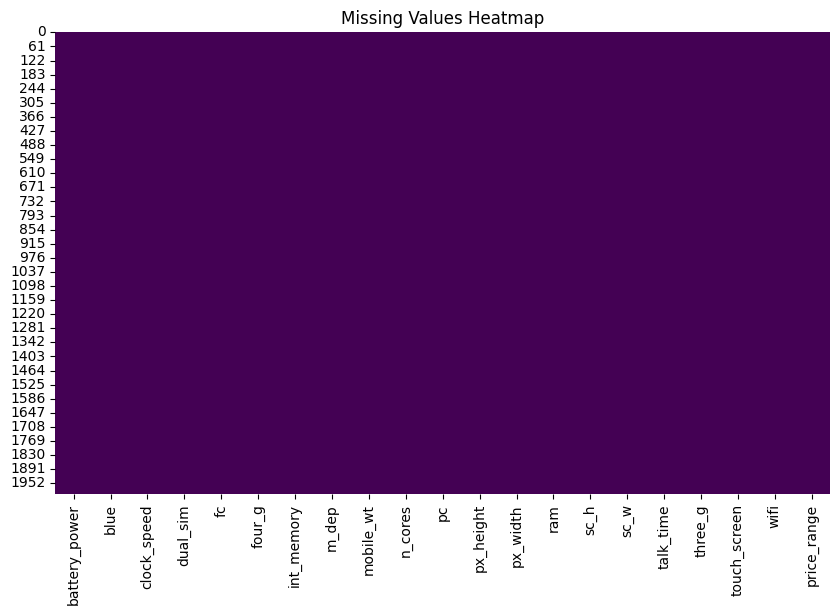

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Example: Fill missing values with the mean (for numerical columns)
df['price_range'] = df['price_range'].fillna(df['price_range'].mean())
df['price_range']

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


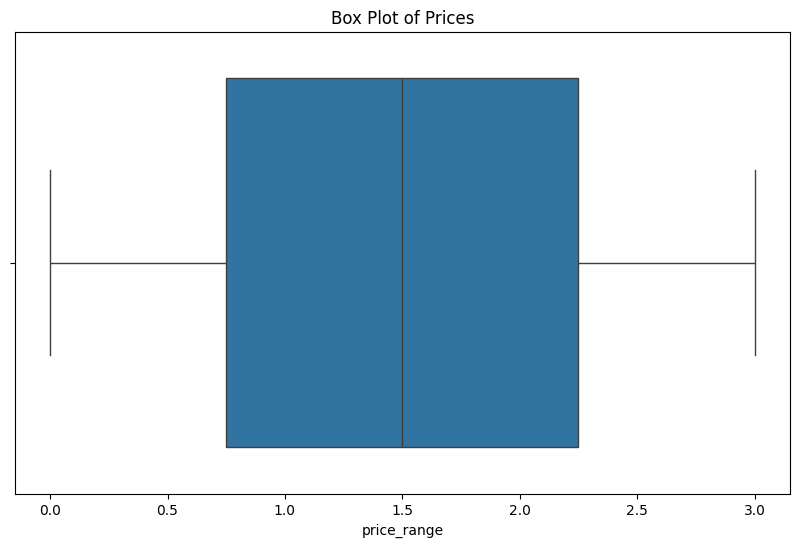

In [ ]:
# Visualizing outliers in the price column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'])
plt.title('Box Plot of Prices')
plt.show()


In [ ]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = abs(z_scores)
threshold = 3
outliers = (abs_z_scores > threshold).any(axis=1)

# Get the indices of outliers
outlier_indices = df[outliers].index
print(f'Number of outliers: {len(outlier_indices)}')


Number of outliers: 12


Number of outliers using IQR method: 0


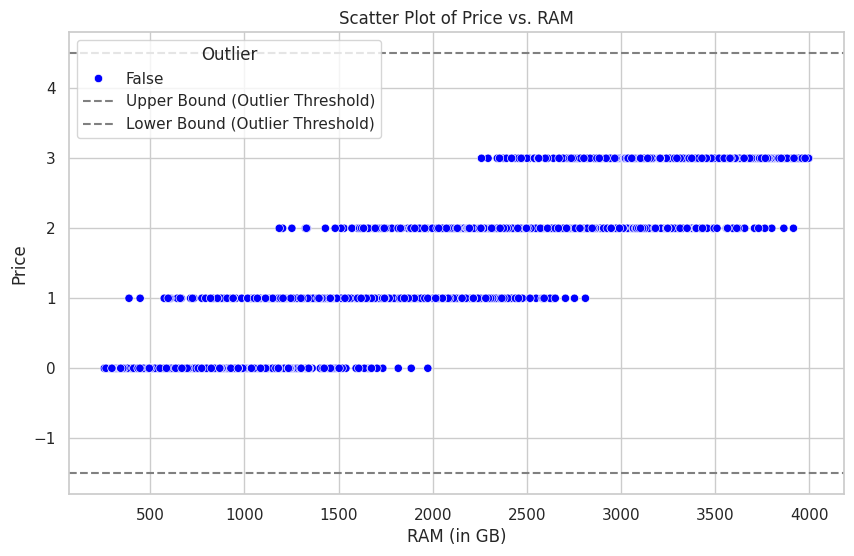

In [ ]:
# Calculate IQR for price
Q1 = df['price_range'].quantile(0.25)
Q3 = df['price_range'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outlier_indices_iqr = df[(df['price_range'] < lower_bound) | (df['price_range'] > upper_bound)].index
print(f'Number of outliers using IQR method: {len(outlier_indices_iqr)}')

# Create a new column to flag outliers
df['outlier'] = np.where((df['price_range'] < lower_bound) | (df['price_range'] > upper_bound), True, False)


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
# Ensure the 'outlier' column is available in the DataFrame used for plotting
scatter = sns.scatterplot(data=df, x='ram', y='price_range', hue='outlier', style='outlier', palette={True: 'red', False: 'blue'})

# Customizing the plot
plt.title('Scatter Plot of Price vs. RAM')
plt.xlabel('RAM (in GB)')
plt.ylabel('Price')
plt.axhline(y=upper_bound, color='gray', linestyle='--', label='Upper Bound (Outlier Threshold)')
plt.axhline(y=lower_bound, color='gray', linestyle='--', label='Lower Bound (Outlier Threshold)')
plt.legend(title='Outlier', loc='upper left')


In [ ]:
# Example: Capping outliers
df['price_range'] = df['price_range'].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
# Refine the dataset by removing outliers
df_refined = df[(df['price_range'] >= lower_bound) & (df['price_range'] <= upper_bound)]

# Save the refined DataFrame to a new CSV file
df_refined.to_csv('refined_mobile_prices.csv', index=False)